## Symmetrized split-step Fourier method simulation for multimode mode waveguide 

# by Uğur Teğin at 10.09.2024

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def gaus2d(x=0, y=0, mx=0, my=0, sx=1, sy=1,p=60,w=26.5e-6):
  """define normalized 2D gaussian"""

  return np.exp(-2*((np.sqrt(x**2+y**2)/w)**p))

spacewidth=54.1442e-6
xres=54.1442e-6/64
x = np.linspace(-spacewidth*0.5,spacewidth*0.5,int(spacewidth/xres))
x1, y1 = np.meshgrid(x, x) # get 2D variables instead of 1D
cp_super_gauss2d = gaus2d(x1, y1)

In [3]:
c = 299792458 # [m/s]
n0 = 1.45                   # Refractive index of medium (1.44 for 1550 nm, 1.45 for 1030 nm)
lambda_c = 1030e-9          # Central wavelength of the input pulse in [m]
w=2*np.pi*c/lambda_c # [Hz]

## SPACE DOMAIN
spacewidth=54.1442e-6
xres = spacewidth/((2**6))
x = np.arange(-spacewidth*0.5,(spacewidth*0.5),xres)
xsteps=len(x)
y = x
[X,Y] = np.meshgrid(x,y)

## FOURIER DOMAIN
a = np.pi/xres  # grid points in "frequency" domain--> {2*pi*(points/mm)}
N = len(x)
aa = np.arange(-a,(a-2*a/N)+(2*a/N),2*a/N)
kx = np.transpose(aa) # "frequency" domain indexing ky = kx; 
ky = kx
[KX,KY] = np.meshgrid(kx,ky)

In [4]:
## OPERATORS
k0 = w*n0/c
n2 = 3.2e-20       #Kerr coefficient (m^2/W)
R = 25e-6
gamma = (2*np.pi*n2/(lambda_c))
delta = 0.01
RefIndex = -1j*((k0*delta)/(R*R))*((X**2)+(Y**2))

D = (0.5*1j/k0)*((-1j*(KX))**2+(-1j*(KY))**2)
dz = 500e-6/10
DFR = np.exp(D*dz/2)

## INPUT 
flength = 5e-3
fstep = flength/dz
print(dz)
print(flength)

x_fwhm = 25e-6
t_fwhm = 100e-15
Ppeak = 30e6 # W

5e-05
0.005


In [5]:
A = np.sqrt(Ppeak/(np.pi*x_fwhm*x_fwhm))*np.exp( - ((X**2)/(2*(x_fwhm/2.35482)**2)+ (Y**2)/(2*(x_fwhm/2.35482)**2)))

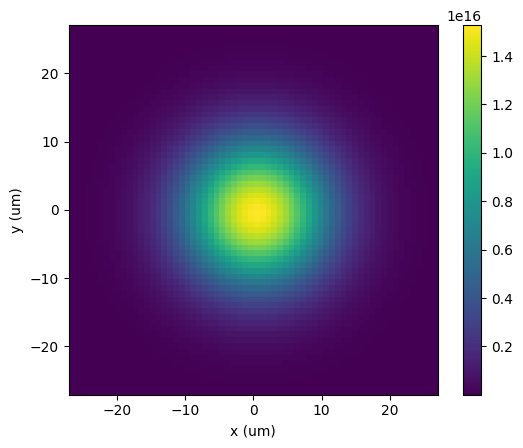

In [6]:
plt.figure()
plt.imshow(np.abs(A)**2,cmap=plt.cm.viridis, interpolation='none', extent=[-(54.1442/2),(54.1442/2),-(54.1442/2),(54.1442/2)])
plt.xlabel('x (um)')
plt.ylabel('y (um)')
plt.colorbar()
plt.show()

In [7]:
A0 = A
for ugur in range(int(fstep)):
    Einf=np.fft.fftshift(np.fft.fft2(A))
    Ein2=np.fft.ifft2(np.fft.ifftshift(Einf*DFR))
    Eout = Ein2
      
    NL2 = 1j*gamma*np.abs(Eout)**2
    NL = RefIndex+NL2
    Eout = Eout*np.exp(NL*dz)
      
    Einf=np.fft.fftshift(np.fft.fft2(Eout))
    Ein2=np.fft.ifft2(np.fft.ifftshift(Einf*DFR))
    #Ain = Ein2;
    A =np.multiply(cp_super_gauss2d,Ein2)

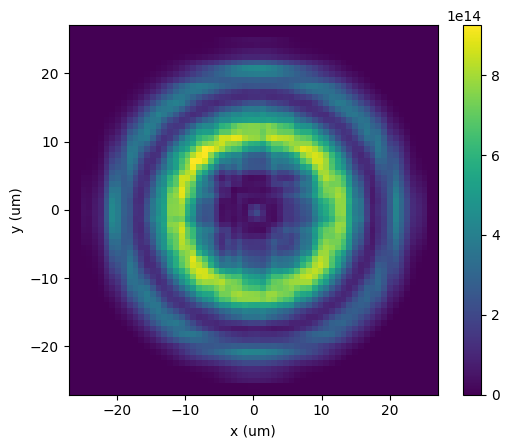

In [8]:
plt.figure()
plt.imshow(np.abs(A)**2,cmap=plt.cm.viridis, interpolation='none', extent=[-(54.1442/2),(54.1442/2),-(54.1442/2),(54.1442/2)])
plt.xlabel('x (um)')
plt.ylabel('y (um)')
plt.colorbar()
plt.show()